## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview

mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.

mouse_df.nunique(axis=1,dropna=True)

0       7
1       8
2       8
3       8
4       8
       ..
1888    8
1889    7
1890    8
1891    8
1892    8
Length: 1893, dtype: int64

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_df.loc[mouse_df["Mouse ID"] == 'g989']

duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_df = mouse_df.loc[mouse_df["Mouse ID"] != 'g989']
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Check the number of mice records in the clean DataFrame.

clean_mouse_df.shape

(1880, 8)

In [43]:
# Check the number of unique mice in the clean DataFrame

num_mice_df = clean_mouse_df["Mouse ID"].unique()
num_mice = len(num_mice_df)
num_mice

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_mouse_df[["Tumor Volume (mm3)"]].describe()



,Tumor Volume (mm3)
count,1880.000000
mean,50.435293
std,8.914197
min,22.050126
25%,45.000000
50%,48.933454
75%,56.324075
max,78.567014


In [45]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_summary= pd.DataFrame({
                                "Mean Tumor Volume": mean_drug,
                                "Median Tumor Volume": median_drug,
                                "Tumor Volume Variance": var_drug,
                                "Tumor Volume Std. Dev": std_drug,
                                "Tumor Volume Std. Error": sem_drug
                                })

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_drug_summary = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

agg_drug_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [48]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Create a group based on the 'Mouse ID' column.
drug_group = clean_mouse_df.groupby('Drug Regimen')

#Count how many times each Unique Mouse ID appears in the group.
mouse_count = drug_group['Mouse ID'].count()

mouse_count


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

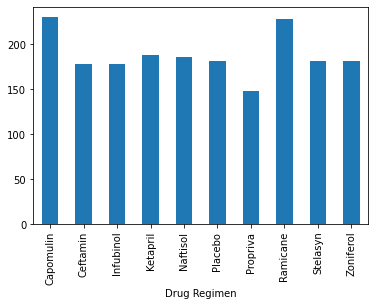

In [49]:
#Create the bar plot

drug_count_bar = mouse_count.plot(kind='bar')

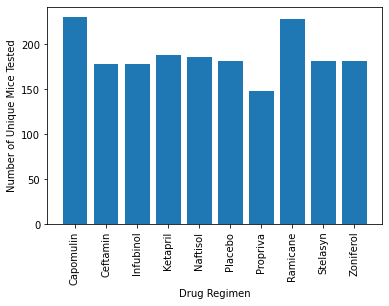

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
y_axis = mouse_count

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.xticks(rotation=90)

plt.show()

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a gender grouping by grouping on the 'Sex' column.
gender_group = clean_mouse_df.groupby('Sex')

#Count how many times each Unique Mouse ID appears in the group.
gender_count = gender_group['Mouse ID'].count()

gender_count


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

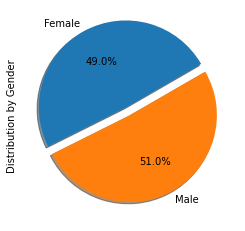

In [92]:
#Create the pie chart

gender_count_pie = gender_count.plot(kind='pie', xlabel="", ylabel="Distribution by Gender",shadow= True, startangle= 30, autopct= '%1.1f%%', explode=explode)
#gender_count.plot.set(xlabel="",ylabel="Distribution by Gender")

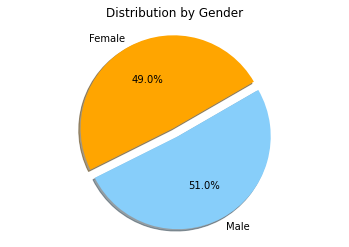

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
colors = ['orange', 'lightskyblue']
explode = (0.1,0)

#Create the pie chart
plt.pie(gender_count,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=30)
plt.title("Distribution by Gender")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tmpt_df = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tmpt_df = max_tmpt_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tmpt_merged = max_tmpt_df.merge(clean_mouse_df,on=['Mouse ID','Timepoint'])
max_tmpt_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


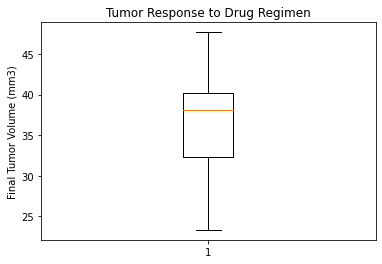

The lower quartile of tumor volume response is: 32.37735684 (mm3)
The upper quartile of tumor volume response is: 40.1592203 (mm3)
The interquartile range of tumor volume response is: 7.781863460000004 (mm3)
The the median of tumor volume response is: 38.1251644 (mm3)
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


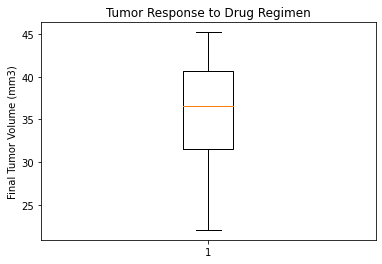

The lower quartile of tumor volume response is: 31.56046955 (mm3)
The upper quartile of tumor volume response is: 40.65900627 (mm3)
The interquartile range of tumor volume response is: 9.098536719999998 (mm3)
The the median of tumor volume response is: 36.56165229 (mm3)
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


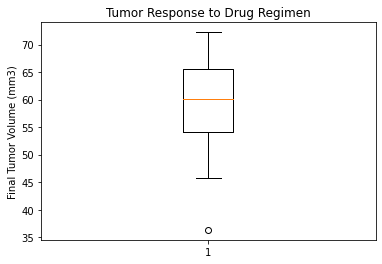

The lower quartile of tumor volume response is: 54.04860769 (mm3)
The upper quartile of tumor volume response is: 65.52574285 (mm3)
The interquartile range of tumor volume response is: 11.477135160000003 (mm3)
The the median of tumor volume response is: 60.16518046 (mm3)
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


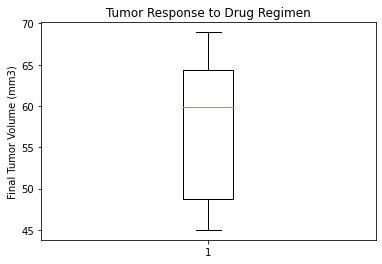

The lower quartile of tumor volume response is: 48.72207785 (mm3)
The upper quartile of tumor volume response is: 64.29983003 (mm3)
The interquartile range of tumor volume response is: 15.577752179999997 (mm3)
The the median of tumor volume response is: 59.85195552 (mm3)
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [102]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    #drug_vol = max_tmpt_merged.loc[max_tmpt_merged['Drug Regimen'] == treatment]
    
    drug_vol = max_tmpt_merged.loc[max_tmpt_merged['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset to add to the tumor data list
    
    tumor_data.append(drug_vol)
    
    # Determine outliers using upper and lower bounds
    #Do this on drug_vol, get the block of code where we did outliers
    
    fig1, ax1 = plt.subplots()
    ax1.set_title('Tumor Response to Drug Regimen')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(drug_vol)
    plt.show()
    
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor volume response is: {lowerq} (mm3)")
    print(f"The upper quartile of tumor volume response is: {upperq} (mm3)")
    print(f"The interquartile range of tumor volume response is: {iqr} (mm3)")
    print(f"The the median of tumor volume response is: {quartiles[0.5]} (mm3)")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

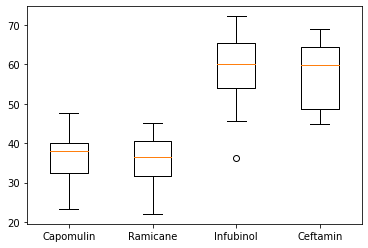

In [103]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data, labels=treatments)
plt.show()

## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Extract Mouse IDs for mice treated with Capomulin
Capomulin_mice_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']

Capomulin_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [63]:
#Extract Mouse ID = s185

Mouse_s185 = Capomulin_mice_df.loc[Capomulin_mice_df['Mouse ID'] == 's185']
Mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<function matplotlib.pyplot.show(close=None, block=None)>

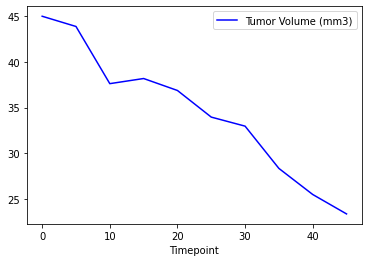

In [64]:
#Plot Tumor Volume and Timepoint for Mouse ID s185

Mouse_s185.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)', color ='blue')
plt.show

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create average tumor volume group
Avg_tumor_vol = Capomulin_mice_df.groupby('Mouse ID').mean()


Avg_tumor_vol.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

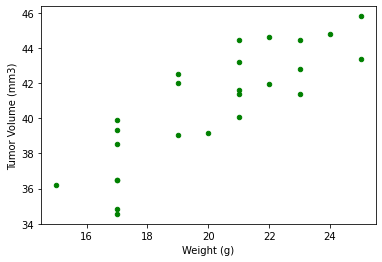

In [66]:
#Create scatter plot

Avg_tumor_vol.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='green')

## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate the correlation coefficient

avg_tumor_size = Avg_tumor_vol.iloc[:,3]
mouse_weight = Avg_tumor_vol.iloc[:,1]

correlation = st.pearsonr(mouse_weight,avg_tumor_size)

print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")



The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


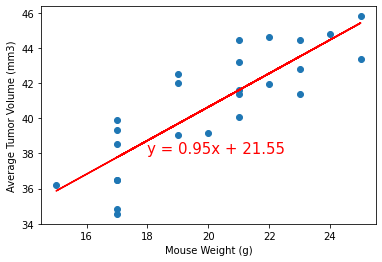

In [74]:
#Calculate the linear regression and fit the slope-intercept equation to the scatter plot.


x_values = Avg_tumor_vol['Weight (g)']
y_values = Avg_tumor_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()